In [3]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
from matplotlib import rcParams
import pickle,os
from importlib import reload
import sys
sys.path.append('../src')
import utils_enrich


cmap = sns.cm.rocket_r

def get_prob_single_clustering(df_clustering, clustering_column = 'Cluster genes'):
    '''
    df_clustering has in "clustering_column" a list of genes for each row, space separeted
    '''
    bins_size = df_clustering[clustering_column].str.split(' ').apply(len)
    n = bins_size.sum()
    p = ((bins_size/n)*((bins_size-1)/(n-1))).sum()
    return p


sig_edge_q=[.05,.95]
sig_edge_thresholds = None#[.15,.15]#[0,0]

N_REP=1000
str_name = str(sig_edge_q[-1]) if sig_edge_thresholds is None else str(sig_edge_thresholds[-1])
str_name = str_name + '_nrep_'+str(N_REP)
diff_alpha = 0.1#'nominal'#0.5
sig_alpha = 0.01#'nominal'#0.5
str_name = str(sig_edge_q[-1]) if sig_edge_thresholds is None else str(sig_edge_thresholds[-1])
str_name = str_name +'_sig_alpha_'+str(sig_alpha)+ '_diffalpha_'+str(diff_alpha)+ '_nrep_'+str(N_REP)

dir_pcorr_output = "../data/"
list_COPD_genes = ['FAM13A','HHIP','PPA2','BTC','TET2','NPNT','PPM1K','NAP1L5']


list_nreg = [0,1,5,10,25,50,75,100]
list_minL = [0,0.1,1,10]
chro = '4'#4'

df_cl_case = pd.DataFrame()
list_sig_case = []
df_info_nt = []
list_prob_cooc = []
df_gene_scores = pd.DataFrame()
for nreg in tqdm(list_nreg):
    for minL in list_minL:
        if nreg==0 and minL != 0:
            continue
        
        FOLDER_DATA = dir_pcorr_output+'/LTRC/nreg_%s_minL_%s_ch_%s/'%(nreg,minL,chro)
        FOLDER_DATA_ANALYSIS = FOLDER_DATA + 'Analysis_%s/'%(str_name)
        path_file_clustering = FOLDER_DATA_ANALYSIS+ 'case_Clustering_MaxMod.csv'
        if not os.path.exists(path_file_clustering):
            print(path_file_clustering)
            continue

        new_df_cl_case = pd.read_csv(path_file_clustering,index_col=0)
        df_cl_case = pd.concat([df_cl_case,new_df_cl_case]) 
        list_sig_case.append(pd.read_csv(FOLDER_DATA_ANALYSIS+ 'Pcorr_significant_edges_nrep_%i_case.csv'%N_REP).values)
        g = nx.from_edgelist(list_sig_case[-1])
        lcc= max([len(x) for x in nx.connected_components(g)])
        density = nx.density(g)#2*g.number_of_nodes()/((N_GENES-1)*N_GENES)
        df_info_nt.append([nreg,minL,density,lcc])
        list_prob_cooc.append(get_prob_single_clustering(new_df_cl_case))
        
df_info_nt = pd.DataFrame(df_info_nt,columns = ['n_genes','min_lambda','density','LCC'])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 463.05it/s]

../data//LTRC/nreg_0_minL_0_ch_4/Analysis_0.95_sig_alpha_0.01_diffalpha_0.1_nrep_1000/case_Clustering_MaxMod.csv
../data//LTRC/nreg_1_minL_0_ch_4/Analysis_0.95_sig_alpha_0.01_diffalpha_0.1_nrep_1000/case_Clustering_MaxMod.csv
../data//LTRC/nreg_1_minL_0.1_ch_4/Analysis_0.95_sig_alpha_0.01_diffalpha_0.1_nrep_1000/case_Clustering_MaxMod.csv
../data//LTRC/nreg_1_minL_1_ch_4/Analysis_0.95_sig_alpha_0.01_diffalpha_0.1_nrep_1000/case_Clustering_MaxMod.csv
../data//LTRC/nreg_1_minL_10_ch_4/Analysis_0.95_sig_alpha_0.01_diffalpha_0.1_nrep_1000/case_Clustering_MaxMod.csv
../data//LTRC/nreg_5_minL_0_ch_4/Analysis_0.95_sig_alpha_0.01_diffalpha_0.1_nrep_1000/case_Clustering_MaxMod.csv
../data//LTRC/nreg_5_minL_0.1_ch_4/Analysis_0.95_sig_alpha_0.01_diffalpha_0.1_nrep_1000/case_Clustering_MaxMod.csv
../data//LTRC/nreg_5_minL_1_ch_4/Analysis_0.95_sig_alpha_0.01_diffalpha_0.1_nrep_1000/case_Clustering_MaxMod.csv
../data//LTRC/nreg_5_minL_10_ch_4/Analysis_0.95_sig_alpha_0.01_diffalpha_0.1_nrep_1000/case

In [ ]:
'../data/LTRC/nreg__minL_0_ch_4/Analysis_0.95_sig_alpha_0.01_diffalpha_0.1_nrep_1000/

### Figure 6: Partial Correlation Network topologies

ValueError: zero-size array to reduction operation fmin which has no identity

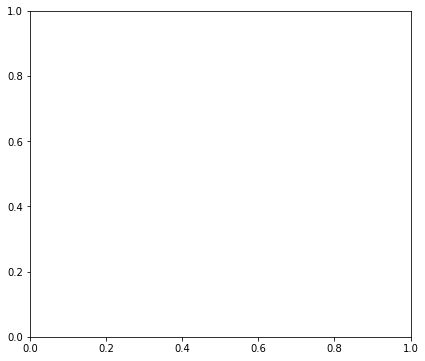

In [2]:
rcParams.update({'font.size': 13})
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.heatmap(df_info_nt.pivot(index='n_genes',columns='min_lambda',values='density').sort_index(ascending=False),
           cmap=cmap,annot=True,fmt = '.2f')
plt.xlabel('min_lambda\n(a)')
plt.title('Network Density')
plt.subplot(1,2,2)
sns.heatmap(df_info_nt.pivot(index='n_genes',columns='min_lambda',values='LCC').sort_index(ascending=False),
           cmap=cmap,annot=True,fmt = '.0f')
plt.title('Size Largest Connected Component')
plt.xlabel('min_lambda\n(b)')
#plt.savefig('../figures/Figure 4.pdf',dpi=500)



Text(0.5, 30.0, 'min_lambda\n(b)')

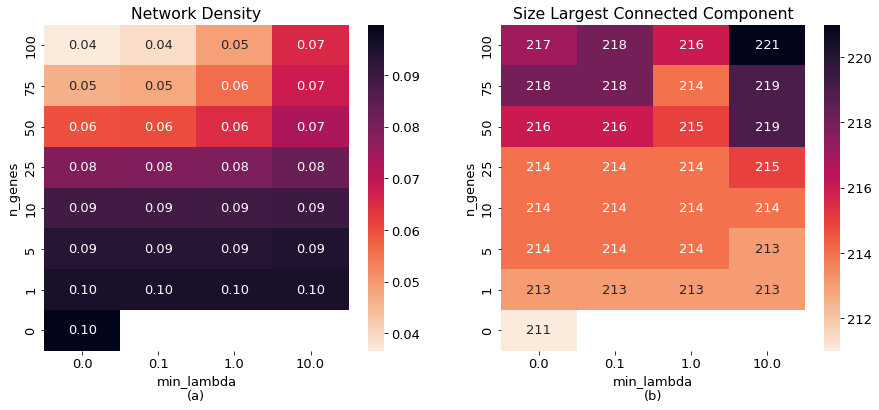

In [6]:
rcParams.update({'font.size': 13})
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.heatmap(df_info_nt.pivot(index='n_genes',columns='min_lambda',values='density').sort_index(ascending=False),
           cmap=cmap,annot=True,fmt = '.2f')
plt.xlabel('min_lambda\n(a)')
plt.title('Network Density')
plt.subplot(1,2,2)
sns.heatmap(df_info_nt.pivot(index='n_genes',columns='min_lambda',values='LCC').sort_index(ascending=False),
           cmap=cmap,annot=True,fmt = '.0f')
plt.title('Size Largest Connected Component')
plt.xlabel('min_lambda\n(b)')




### Figure 7: Co-occurrence clustering heatmap

HHIP      0
BTC       0
NPNT      0
PPM1K     0
PPA2      3
TET2      3
FAM13A    4
NAP1L5    8
Name: Cluster, dtype: object

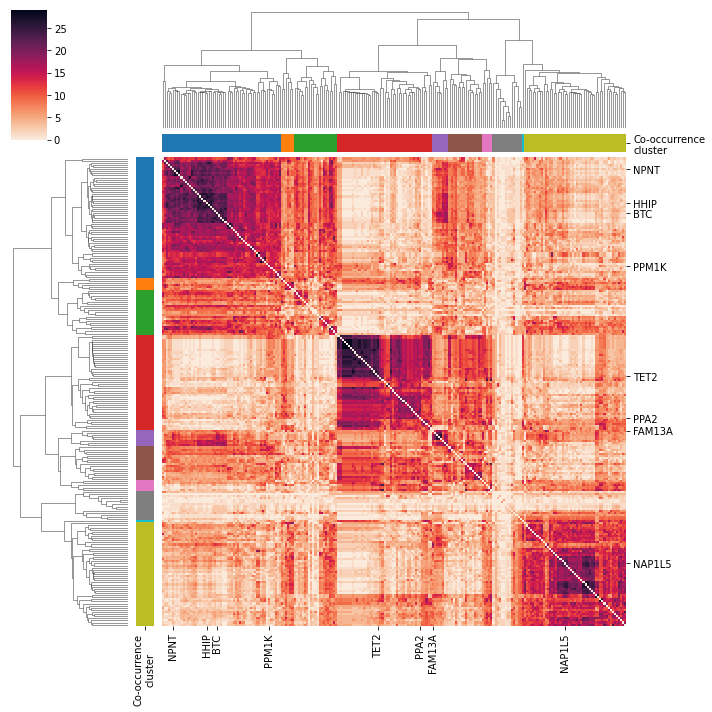

In [96]:
# build co-occurence matrix
import re
re_exp = r" "
vectorizer = CountVectorizer(tokenizer=lambda text: re.split(re_exp,text))
#vectorizer = CountVectorizer(token_pattern='(?u)\s\w\w+\s')
X = vectorizer.fit_transform(df_cl_case['Cluster genes'].values)
df_cooc = (X.T * X) # this is co-occurrence matrix in sparse csr format
df_cooc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
df_cooc = pd.DataFrame(df_cooc.todense(),index = vectorizer.get_feature_names_out(),columns= vectorizer.get_feature_names_out())
df_cooc.index = df_cooc.index.str.upper()
df_cooc.columns = df_cooc.columns.str.upper()

# retrieve hierarchical clusters using fcluster 
d = sch.distance.pdist(df_cooc)
L = sch.linkage(d, method='average')
# 0.2 can be modified to retrieve more stringent or relaxed clusters
clusters = sch.fcluster(L,10,'maxclust')-1#.35*d.max(), 'distance')-1

palette = sns.color_palette(n_colors = len(set(clusters)))
tmp_colors = [palette[cl] for cl in  clusters]
df_cl = pd.DataFrame([clusters,tmp_colors],index = ['Cluster','Co-occurrence\ncluster'],columns = df_cooc.index).T
h = sns.clustermap(df_cooc,row_linkage=L, col_linkage=L,yticklabels=False,
                   row_colors=df_cl['Co-occurrence\ncluster'], col_colors=df_cl['Co-occurrence\ncluster'],
                  cmap=cmap)


reordered_labels = df_cl.index[h.dendrogram_row.reordered_ind].tolist()
use_ticks = [reordered_labels.index(label) + .5 for label in list_COPD_genes]
h.ax_heatmap.set(yticks=use_ticks, yticklabels=list_COPD_genes,xticks=use_ticks, xticklabels=list_COPD_genes)

plt.savefig('../figures/Figure 5_Coclustering_all.pdf',dpi=500)
df_cl.loc[list_COPD_genes].Cluster.sort_values()


PPA2      0
TET2      0
HHIP      1
BTC       1
NPNT      1
PPM1K     1
NAP1L5    6
FAM13A    9
Name: Cluster, dtype: object

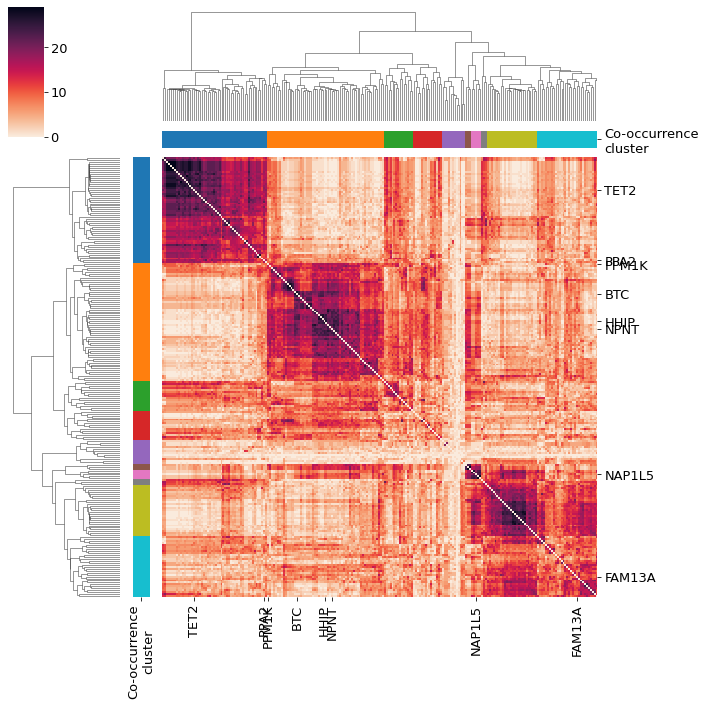

In [7]:
# build co-occurence matrix
import re
re_exp = r" "
vectorizer = CountVectorizer(tokenizer=lambda text: re.split(re_exp,text))
#vectorizer = CountVectorizer(token_pattern='(?u)\s\w\w+\s')
X = vectorizer.fit_transform(df_cl_case['Cluster genes'].values)
df_cooc = (X.T * X) # this is co-occurrence matrix in sparse csr format
df_cooc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
df_cooc = pd.DataFrame(df_cooc.todense(),index = vectorizer.get_feature_names_out(),columns= vectorizer.get_feature_names_out())
df_cooc.index = df_cooc.index.str.upper()
df_cooc.columns = df_cooc.columns.str.upper()

# retrieve hierarchical clusters using fcluster 
d = sch.distance.pdist(df_cooc)
L = sch.linkage(d, method='average')
# 0.2 can be modified to retrieve more stringent or relaxed clusters
clusters = sch.fcluster(L,10,'maxclust')-1#.35*d.max(), 'distance')-1

palette = sns.color_palette(n_colors = len(set(clusters)))
tmp_colors = [palette[cl] for cl in  clusters]
df_cl = pd.DataFrame([clusters,tmp_colors],index = ['Cluster','Co-occurrence\ncluster'],columns = df_cooc.index).T
h = sns.clustermap(df_cooc,row_linkage=L, col_linkage=L,yticklabels=False,
                   row_colors=df_cl['Co-occurrence\ncluster'], col_colors=df_cl['Co-occurrence\ncluster'],
                  cmap=cmap)


reordered_labels = df_cl.index[h.dendrogram_row.reordered_ind].tolist()
use_ticks = [reordered_labels.index(label) + .5 for label in list_COPD_genes]
h.ax_heatmap.set(yticks=use_ticks, yticklabels=list_COPD_genes,xticks=use_ticks, xticklabels=list_COPD_genes)


df_cl.loc[list_COPD_genes].Cluster.sort_values()


In [ ]:
tmp_cl = df_cl.loc['HHIP'].Cluster
tmp_genes = df_cl.query('Cluster ==@tmp_cl').index
tmp_df = df_cooc.loc[tmp_genes,tmp_genes]
tmp_index = [i for i,gene in enumerate(df_cooc.index) if gene in tmp_genes]
sns.clustermap(tmp_df,yticklabels=True,cmap=cmap)#,row_linkage=L[tmp_index], col_linkage=L[tmp_index])
print('Avarage co-occurency of the HHIP cluster:',(tmp_df.mean().mean()/29).round(4)*100,'%')
print('FAM13A-TET2 co-occurency frequency', (df_cooc.loc['FAM13A','TET2']/29).round(4)*100,'%')
plt.savefig('../figures/Figure 5_Cluster_CCG.pdf',dpi=500)




In [92]:
#ray.shutdown()
reload(utils_enrich)
enr_gene_list = list(tmp_genes)
df_enrich_cl = parallel_gseapy_enr(enr_gene_list,background_gene= list(df_cooc.index))
df_enrich_cl['CCG'] = df_enrich_cl.head(50).Genes.map(lambda x: [y for y in x.split(' ') if y in list_COPD_genes])
df_enrich_cl.head(20).to_csv('../tables/COPD_nt_clust_enrichment.csv',index=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106/106 [00:10<00:00, 10.06it/s]


In [93]:
df_enrich_cl.head(20)

,Gene_set,Term,P-value,Adjusted P-value,Odds Ratio,Genes,CCG
0,Epigenomics Roadmap HM ChIP-seq,H3K27me3 Colonic Mucosa,2.998504e-07,0.000088,7.697368,CDS1 PARM1 SOWAHB HHIP SYNPO2 PRDM5 NDNF PKD2 ...,"[HHIP, NPNT, BTC]"
1,ENCODE and ChEA Consensus TFs from ChIP-X,SUZ12 CHEA,6.479319e-06,0.000538,8.312500,CAMK2D SOWAHB HHIP LEF1 GAB1 TBC1D9 NDNF UNC5C...,"[HHIP, NPNT]"
2,ESCAPE,CHiP RNF2-18974828,4.848703e-06,0.001076,16.000000,CDS1 CAMK2D HHIP LEF1 SETD7 UNC5C NPNT PRSS12 ...,"[HHIP, NPNT]"
3,ChEA 2022,RNF2 18974828 ChIP-Seq MESCs Mouse,4.848703e-06,0.001588,16.000000,CDS1 CAMK2D HHIP LEF1 SETD7 UNC5C NPNT PRSS12 ...,"[HHIP, NPNT]"
4,ChEA 2022,EZH2 18974828 ChIP-Seq MESCs Mouse,4.848703e-06,0.001588,16.000000,CDS1 CAMK2D HHIP LEF1 SETD7 UNC5C NPNT PRSS12 ...,"[HHIP, NPNT]"
5,ESCAPE,CHiP RNF2-16625203,5.293626e-05,0.002938,9.782609,CDS1 CAMK2D HHIP LEF1 GAB1 UNC5C NPNT PTPN13 P...,"[HHIP, NPNT]"
6,ESCAPE,mMEF K27me3 17603471,3.357320e-05,0.002938,13.600000,CDKL2 CDS1 PARM1 USP53 HHIP LEF1 SHROOM3 TBC1D...,"[HHIP, NPNT]"
7,ESCAPE,CHiP JARID2-20064375,4.232516e-05,0.002938,inf,FRAS1 LEF1 PRKG2 TSPAN5 SLC39A8 UNC5C MAML3 RN...,[NPNT]
8,ESCAPE,CHiP SUZ12-18555785,8.615073e-05,0.003188,12.450704,CAMK2D GAB1 UNC5C NPNT DKK2 BMP3 FRAS1 PRKG2 P...,[NPNT]
9,ESCAPE,CHiP SUZ12-16625203,7.249242e-05,0.003188,7.882353,CDS1 CAMK2D HHIP LEF1 GAB1 UNC5C NPNT PTPN13 P...,"[HHIP, NPNT]"


In [99]:
# all clusters.. nothing interesting
from IPython.display import display
dict_enr={}
for tmp_cl in range(10):
    tmp_genes = df_cl.query('Cluster ==@tmp_cl').index

    enr_gene_list = list(tmp_genes)
    df_enrich_cl = parallel_gseapy_enr(enr_gene_list,background_gene= list(df_cooc.index))
    df_enrich_cl['CCG'] = df_enrich_cl.head(50).Genes.map(lambda x: [y for y in x.split(' ') if y in list_COPD_genes])
    display(df_enrich_cl.head(20))
    dict_enr[tmp_cl] = df_enrich_cl

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106/106 [00:09<00:00, 10.76it/s]


,Gene_set,Term,P-value,Adjusted P-value,Odds Ratio,Genes,CCG
0,Epigenomics Roadmap HM ChIP-seq,H3K27me3 Colonic Mucosa,3.456869e-11,1.002492e-08,14.537634,CDS1 PARM1 SOWAHB HHIP SYNPO2 PRDM5 NDNF PKD2 ...,"[HHIP, NPNT, BTC]"
1,Rummagene kinases,PMC8100660-Table 1.xlsx-GEO Turquoise gene-PRK...,1.035942e-08,1.286640e-05,10.895238,ANXA3 GYPE HHIP SYNPO2 PRDM5 SCD5 GAB1 ANK2 ND...,"[HHIP, NPNT]"
2,ESCAPE,CHiP JARID2-20064375,6.619425e-07,1.390079e-04,inf,FRAS1 LEF1 PRKG2 TSPAN5 SLC39A8 UNC5C MAML3 RN...,[NPNT]
3,ChEA 2022,JARID2 20064375 ChIP-Seq MESCs Mouse,6.619425e-07,4.190096e-04,inf,FRAS1 LEF1 PRKG2 TSPAN5 SLC39A8 UNC5C MAML3 RN...,[NPNT]
4,ENCODE Histone Modifications 2015,H3K9me3 CD14-positive monocyte hg19,1.994543e-06,5.150540e-04,15.954545,PARM1 ANXA3 HHIP NDNF UNC5C NPNT PRSS12 TMEM15...,"[HHIP, NPNT, BTC]"
5,ENCODE Histone Modifications 2015,H3K27me3 fibroblast of lung hg19,2.710811e-06,5.150540e-04,7.000000,CDS1 PARM1 SOWAHB HHIP CFI LEF1 SCD5 SETD7 SHR...,"[HHIP, NPNT, BTC]"
6,Epigenomics Roadmap HM ChIP-seq,H3K27me3 CD4+ CD25int CD127+ Tmem Primary Cells,5.814003e-06,8.430304e-04,34.893617,SMAD1 ANXA3 HHIP SCD5 GAB1 SPP1 PRKG2 SPRY1 FA...,[HHIP]
7,ENCODE Histone Modifications 2015,H3K27me3 spleen mm9,1.964750e-05,9.332565e-04,9.454545,CDS1 SMAD1 PARM1 ANXA3 SYNPO2 GAB1 SHROOM3 UNC...,[]
8,ENCODE Histone Modifications 2015,H4K20me1 A549 hg19,1.964750e-05,9.332565e-04,9.454545,CDS1 PARM1 SOWAHB HHIP GAB1 UNC5C PPM1K RAB33B...,"[HHIP, PPM1K]"
9,ENCODE Histone Modifications 2015,H3K27me3 thymus mm9,1.964750e-05,9.332565e-04,9.454545,CDS1 SOWAHB ANXA3 SYNPO2 GAB1 SHROOM3 NDNF PKD...,[]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106/106 [00:04<00:00, 25.22it/s]


,Gene_set,Term,P-value,Adjusted P-value,Odds Ratio,Genes,CCG
0,Human Gene Atlas,Amygdala,0.000611,0.003669,inf,CAMK2D G3BP2,[]
1,Table Mining of CRISPR Studies,"Supplemental, PMC6879830 (Tablesupplemental)",0.000902,0.006316,25.0,CAMK2D USP53 G3BP2 JADE1 DNAJB14,[]
2,MSigDB Computational,GCM DEAF1,0.000611,0.021401,inf,G3BP2 DNAJB14,[]
3,NCI-Nature 2016,IFN-gamma pathway Homo sapiens 51b1ed75-6193-1...,0.027027,0.027027,inf,CAMK2D,[]
4,NCI-Nature 2016,Notch-mediated HES/HEY network Homo sapiens 8e...,0.027027,0.027027,inf,CAMK2D,[]
5,CCLE Proteomics 2020,COLO679 SKIN TenPx10,0.000591,0.028075,42.2,USP53 G3BP2 DNAJB14,[]
6,CCLE Proteomics 2020,HCC38 BREAST TenPx11,0.000591,0.028075,42.2,USP53 PAQR3 DNAJB14,[]
7,BioPlex 2017,NUP153,0.027027,0.029279,inf,G3BP2,[]
8,BioPlex 2017,POM121,0.027027,0.029279,inf,G3BP2,[]
9,BioPlex 2017,PUSL1,0.027027,0.029279,inf,CAMK2D,[]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106/106 [00:04<00:00, 21.99it/s]


,Gene_set,Term,P-value,Adjusted P-value,Odds Ratio,Genes,CCG
0,HomoloGene,Opisthokonta: Fungi/Metazoa Group,0.002401,0.016808,8.660714,TRMT10A METTL14 CNOT6L SLC10A7 SPATA5,[]
1,Proteomics Drug Atlas 2023,Blonanserin Down,0.000061,0.017135,inf,TRMT10A MMAA NAAA HPSE,[]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106/106 [00:08<00:00, 12.78it/s]


,Gene_set,Term,P-value,Adjusted P-value,Odds Ratio,Genes,CCG
0,ENCODE and ChEA Consensus TFs from ChIP-X,YY1 ENCODE,0.000146,0.011089,5.258065,INTU TET2 NDUFC1 ADH5 ANAPC10 CCNA2 COPS4 MFSD...,"[TET2, PPA2]"
1,MAGNET 2023,Progenitor 2 2 Thion Et Al. 2018,0.000844,0.031878,4.587413,CCNA2 COPS4 ELF2 LSM6 MRPL1 INTU PPA2 HNRNPD L...,[PPA2]
2,MAGNET 2023,STMN1+ Proliferating Cells 7 Culemann Et Al. 2019,0.001594,0.031878,7.967105,CCNA2 LSM6 HNRNPD LARP7 NDUFC1 MAD2L1 SEC31A,[]
3,KEA 2015,CDK2,0.00266,0.045221,8.923077,ANKRD17 CCNA2 SEC24B HNRNPD SMARCAD1 AFF1,[]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106/106 [00:03<00:00, 28.27it/s]


,Gene_set,Term,P-value,Adjusted P-value,Odds Ratio,Genes,CCG
0,SubCell BarCode,HCC827 Cytosol C5 30609389,0.000122,0.001836,127.8,FAM13A HSPA4L PAPSS1,[FAM13A]
1,Orphanet Augmented 2021,Autosomal recessive proximal renal tubular aci...,0.000122,0.0175,127.8,MAPK10 ADH1C FAM13A,[FAM13A]
2,Orphanet Augmented 2021,Genetic transient congenital hypothyroidism OR...,0.001141,0.023317,inf,ADH1C RASSF6,[]
3,Orphanet Augmented 2021,Unilateral multicystic dysplastic kidney ORPHA...,0.001141,0.023317,inf,ADH1C RASSF6,[]
4,Orphanet Augmented 2021,Medullary sponge kidney ORPHA:1309,0.001141,0.023317,inf,ADH1C RASSF6,[]
5,Orphanet Augmented 2021,"Renal dysplasia, bilateral ORPHA:93173",0.001141,0.023317,inf,ADH1C RASSF6,[]
6,Orphanet Augmented 2021,"Renal dysplasia, unilateral ORPHA:93172",0.001141,0.023317,inf,ADH1C RASSF6,[]
7,Orphanet Augmented 2021,Bilateral multicystic dysplastic kidney ORPHA:...,0.001141,0.023317,inf,ADH1C RASSF6,[]
8,SubCell BarCode,H322 Cytosol C5 30609389,0.003362,0.025214,71.0,HSPA4L PAPSS1,[]
9,dbGaP,Calcium,0.001141,0.027393,inf,FAM13A RASSF6,[FAM13A]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106/106 [00:04<00:00, 21.98it/s]


,Gene_set,Term,P-value,Adjusted P-value,Odds Ratio,Genes,CCG
0,GeDiPNet 2023,Dysarthria,0.000253,0.019455,34.0,PRDM8 COQ2 CISD2 SNCA,[]
1,GeDiPNet 2023,Hallucinations,0.000311,0.019455,inf,PRDM8 CISD2 SNCA,[]
2,GeDiPNet 2023,Dysautonomia,0.00119,0.049571,47.307692,COQ2 CISD2 SNCA,[]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106/106 [00:03<00:00, 33.73it/s]


,Gene_set,Term,P-value,Adjusted P-value,Odds Ratio,Genes,CCG
0,CORUM,Exosome (human),0.022522,0.022522,inf,EXOSC9,[]
1,MAGMA Drugs and Diseases,Preservative,0.022522,0.022522,inf,CASP6,[]
2,MAGMA Drugs and Diseases,Thiomersal,0.022522,0.022522,inf,CASP6,[]
3,MAGMA Drugs and Diseases,Nitroxoline,0.022522,0.022522,inf,CASP6,[]
4,MAGMA Drugs and Diseases,Cathepsin Inhibitor,0.022522,0.022522,inf,CASP6,[]
5,MAGMA Drugs and Diseases,Other Antibiotic,0.022522,0.022522,inf,CASP6,[]
6,MAGMA Drugs and Diseases,Methyldopa,0.022522,0.022522,inf,CASP6,[]
7,ClinVar 2019,pontoneocerebellar hypoplasia,0.022522,0.022522,inf,EXOSC9,[]
8,BioCarta 2016,Trefoil Factors Initiate Mucosal Healing Homo...,0.022522,0.02574,inf,CASP6,[]
9,BioCarta 2016,Apoptotic Signaling in Response to DNA Damage ...,0.022522,0.02574,inf,CASP6,[]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106/106 [00:04<00:00, 22.73it/s]


,Gene_set,Term,P-value,Adjusted P-value,Odds Ratio,Genes,CCG
0,Descartes Cell Types and Tissue 2021,Myeloid cells in Placenta,0.000049,0.000979,82.8,CXCL10 CXCL11 CXCL9 HPGDS,[]
1,Elsevier Pathway Collection,CCR1 Expression Targets,0.000202,0.001568,inf,CXCL10 CXCL11 CXCL9,[]
2,Elsevier Pathway Collection,IL6/IL12 Signaling Activates Immune System in ...,0.000202,0.001568,inf,CXCL10 CXCL11 CXCL9,[]
3,Elsevier Pathway Collection,B-Cell Chronic Lymphocytic Leukemia,0.000202,0.001568,inf,CXCL10 CXCL11 CXCL9,[]
4,Elsevier Pathway Collection,Hashimoto's Thyroiditis,0.000202,0.001568,inf,CXCL10 CXCL11 CXCL9,[]
5,Descartes Cell Types and Tissue 2021,Myeloid cells in Lung,0.000202,0.002023,inf,CXCL10 CXCL9 HPGDS,[]
6,NCI-Nature 2016,CXCR3-mediated signaling events Homo sapiens 3...,0.000779,0.004673,56.454545,CXCL10 CXCL11 CXCL9,[]
7,Elsevier Pathway Collection,Proteins Involved in Psoriasis,0.000779,0.004829,56.454545,CXCL10 CXCL11 CXCL9,[]
8,Descartes Cell Types and Tissue 2021,Myeloid cells in Intestine,0.000779,0.005192,56.454545,CXCL10 CXCL9 HPGDS,[]
9,PFOCR Pathways 2023,PMC6172149 F1,0.000202,0.006033,inf,CXCL10 CXCL9 CXCL11,[]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106/106 [00:07<00:00, 14.79it/s]


,Gene_set,Term,P-value,Adjusted P-value,Odds Ratio,Genes,CCG
0,Rummagene transcription factors,PMC5291205-srep41905-s3.xlsx-LPS Datasets gmx-...,0.0,0.000056,inf,OTUD4 CXCL8 RASGEF1B NOCT TNIP3 TIFA CXCL1 CXC...,[]
1,Rummagene signatures,PMC10224979-41598 2023 35468 MOESM4 ESM.xlsx-1...,0.0,0.000229,16.9,CXCL8 USP38 UBE2D3 CXCL1 CXCL3 AREG CXCL2 FGF2...,[]
2,Rummagene signatures,PMC10224979-41598 2023 35468 MOESM4 ESM.xlsx-1...,0.0,0.000229,16.9,CXCL8 USP38 UBE2D3 CXCL1 CXCL3 AREG CXCL2 FGF2...,[]
3,Rummagene signatures,PMC10224979-41598 2023 35468 MOESM4 ESM.xlsx-1...,0.0,0.000229,16.9,CXCL8 USP38 UBE2D3 CXCL1 CXCL3 AREG CXCL2 FGF2...,[]
4,Rummagene signatures,PMC10224979-41598 2023 35468 MOESM4 ESM.xlsx-1...,0.0,0.000229,16.9,CXCL8 USP38 UBE2D3 CXCL1 CXCL3 AREG CXCL2 FGF2...,[]
5,Rummagene signatures,PMC9220295-NIHMS1696694-supplement-MMC1.xlsx-U...,0.000001,0.000631,inf,OTUD4 CXCL8 NOCT TIFA CXCL1 CXCL3 CXCL2 CXCL5 ...,[]
6,Rummagene kinases,PMC7000350-mmc2.xlsx-HER2 Regulate genes-Suppl...,0.000001,0.001121,18.378378,CXCL8 NOCT TNIP3 GAR1 CXCL1 GPAT3 ABCE1 CXCL3 ...,[NAP1L5]
7,Rummagene signatures,PMC9464399-12872 2022 2841 MOESM3 ESM.xlsx-IA ...,0.000004,0.002462,9.485714,OTUD4 CXCL8 UBE2D3 CXCL1 SGMS2 SDAD1 AREG NFKB...,[]
8,Rummagene signatures,PMC9010035-Table2.XLSX-up Sample 4 Vs Sample 0...,0.000004,0.002462,inf,CXCL8 STBD1 GPAT3 CXCL3 CXCL2 FGF2 NAP1L5 HERC6,[NAP1L5]
9,Rummagene signatures,PMC9464399-12872 2022 2841 MOESM3 ESM.xlsx-all...,0.000004,0.002462,9.485714,OTUD4 CXCL8 UBE2D3 CXCL1 SGMS2 SDAD1 AREG NFKB...,[]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106/106 [00:02<00:00, 38.64it/s]


,Gene_set,Term,P-value,Adjusted P-value,Odds Ratio,Genes,CCG
0,ClinVar 2019,"limb-girdle muscular dystrophies, autosomal do...",0.004504,0.004504,inf,HNRNPDL,[]
1,ClinVar 2019,limb-girdle muscular dystrophy,0.004504,0.004504,inf,HNRNPDL,[]
2,PFOCR Pathways 2023,PMC3270058 F9,0.004504,0.004504,inf,HNRNPDL,[]
3,Human Phenotype Ontology,Pelvic girdle muscle weakness (HP:0003749),0.004504,0.004955,inf,HNRNPDL,[]
4,Human Phenotype Ontology,Abnormality of the shoulder girdle musculature...,0.004504,0.004955,inf,HNRNPDL,[]
5,Human Phenotype Ontology,Abnormality of the hip-girdle musculature (HP:...,0.004504,0.004955,inf,HNRNPDL,[]
6,Human Phenotype Ontology,Shoulder girdle muscle weakness (HP:0003547),0.004504,0.004955,inf,HNRNPDL,[]
7,Human Phenotype Ontology,Proximal amyotrophy (HP:0007126),0.004504,0.004955,inf,HNRNPDL,[]
8,Human Phenotype Ontology,Slow progression (HP:0003677),0.004504,0.004955,inf,HNRNPDL,[]
9,Human Phenotype Ontology,Abnormality of the foot musculature (HP:0001436),0.004504,0.004955,inf,HNRNPDL,[]


In [65]:
#reload(gseapy)
import gseapy
reload(gseapy)
enr_gene_list = list(tmp_genes)

tmp_df_result = gseapy.enrichr(gene_list=list(df_cooc.index),#enr_gene_list
                            #background= df_cooc.index,
                               gene_sets=['Epigenomics_Roadmap_HM_ChIP-seq'],
                               verbose=True)
tmp_df_result = tmp_df_result.res2d
tmp_df_result = tmp_df_result.set_index('Term')

2024-03-01 14:20:40,407 [INFO] Run: Epigenomics_Roadmap_HM_ChIP-seq 
2024-03-01 14:20:41,148 [INFO] Done.


Avarage co-occurency of the PPA2 cluster: 57.15 %
FAM13A-TET2 co-occurency frequency 31.03 %


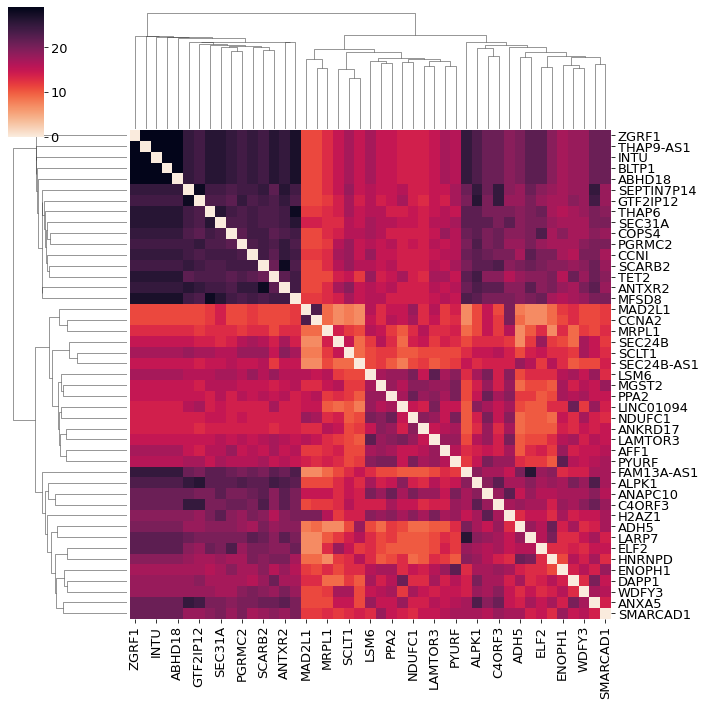

In [22]:
tmp_cl = df_cl.loc['PPA2'].Cluster
tmp_genes = df_cl.query('Cluster ==@tmp_cl').index
tmp_df = df_cooc.loc[tmp_genes,tmp_genes]
tmp_index = [i for i,gene in enumerate(df_cooc.index) if gene in tmp_genes]
sns.clustermap(tmp_df,yticklabels=True,cmap=cmap)#,row_linkage=L[tmp_index], col_linkage=L[tmp_index])
print('Avarage co-occurency of the PPA2 cluster:',(tmp_df.mean().mean()/29).round(4)*100,'%')
print('FAM13A-TET2 co-occurency frequency', (df_cooc.loc['FAM13A','TET2']/29).round(4)*100,'%')
plt.savefig('../figures/Figure 5_Cluster_CCG.pdf',dpi=500)




### Table 2: Co-occurrence CCG table - Binomial Distribution

In [23]:
from scipy.stats import binomtest, poisson

mu = sum(list_prob_cooc)
rv = poisson(mu)

df_poi_pval = df_cooc.loc[list_COPD_genes,list_COPD_genes].copy()
df_poi_pval.iloc[:,:] = 1-rv.cdf(df_poi_pval)
df_poi_pval

,FAM13A,HHIP,PPA2,BTC,TET2,NPNT,PPM1K,NAP1L5
FAM13A,0.999585,0.377696,0.377696,0.097139,0.257278,0.516878,0.996351,0.788426
HHIP,0.377696,0.999585,0.659875,0.000023,0.999585,0.000065,0.013925,0.887482
PPA2,0.377696,0.659875,0.999585,0.951088,0.006477,0.951088,0.887482,0.983763
BTC,0.097139,0.000023,0.951088,0.999585,0.996351,0.000007,0.054070,0.983763
TET2,0.257278,0.999585,0.006477,0.996351,0.999585,0.983763,0.659875,0.983763
NPNT,0.516878,0.000065,0.951088,0.000007,0.983763,0.999585,0.006477,0.788426
PPM1K,0.996351,0.013925,0.887482,0.054070,0.659875,0.006477,0.999585,0.983763
NAP1L5,0.788426,0.887482,0.983763,0.983763,0.983763,0.788426,0.983763,0.999585


In [24]:
df_cooc.loc[list_COPD_genes,list_COPD_genes].copy()

,FAM13A,HHIP,PPA2,BTC,TET2,NPNT,PPM1K,NAP1L5
FAM13A,0,8,8,11,9,7,1,5
HHIP,8,0,6,21,0,20,14,4
PPA2,8,6,0,3,15,3,4,2
BTC,11,21,3,0,1,22,12,2
TET2,9,0,15,1,0,2,6,2
NPNT,7,20,3,22,2,0,15,5
PPM1K,1,14,4,12,6,15,0,2
NAP1L5,5,4,2,2,2,5,2,0


In [25]:
from statsmodels.stats.multitest import multipletests

#print multiple test adjusted significant co-occurence of genes
np_poi_pval_adj = np.where(multipletests(df_poi_pval.values.reshape(-1),method = 'fdr_bh')[0].reshape(df_poi_pval.shape))
print('Statistically Significant co-occurrent genes (adj pval<.05)')
print('\n'.join([list_COPD_genes[x[0]] +'-'+ list_COPD_genes[x[1]] for x in zip(*np_poi_pval_adj)]))



Statistically Significant co-occurrent genes (adj pval<.05)
HHIP-BTC
HHIP-NPNT
PPA2-TET2
BTC-HHIP
BTC-NPNT
TET2-PPA2
NPNT-HHIP
NPNT-BTC
NPNT-PPM1K
PPM1K-NPNT


In [26]:
df_cooc.loc[list_COPD_genes,list_COPD_genes].to_csv('../tables/Table S3 co_occurence_table.csv')
df_cooc.loc[list_COPD_genes,list_COPD_genes]

,FAM13A,HHIP,PPA2,BTC,TET2,NPNT,PPM1K,NAP1L5
FAM13A,0,8,8,11,9,7,1,5
HHIP,8,0,6,21,0,20,14,4
PPA2,8,6,0,3,15,3,4,2
BTC,11,21,3,0,1,22,12,2
TET2,9,0,15,1,0,2,6,2
NPNT,7,20,3,22,2,0,15,5
PPM1K,1,14,4,12,6,15,0,2
NAP1L5,5,4,2,2,2,5,2,0


### Degree analysis

In [21]:
COPD_genes = {'FAM13A', 'HHIP', 'PPA2', 'BTC', 'TET2', 'NPNT', 'PPM1K', 'NAP1L5'}
list_copd_genes = list(COPD_genes)
df_gene_scores_mean = df_gene_scores.groupby(['Gene','pop']).mean()
df_gene_scores_degree = df_gene_scores_mean.reset_index().pivot(index='Gene',columns = 'pop',values='Degree')
df_gene_scores_degree['case_control_diff'] = df_gene_scores_degree['case'] - df_gene_scores_degree['control']
df_gene_scores_degree['case_control_diff_abs'] = (df_gene_scores_degree['case'] - df_gene_scores_degree['control']).abs()
df_gene_scores_degree['case_control_diff_ratio'] = df_gene_scores_degree['case_control_diff']/df_gene_scores_degree['control']
df_gene_scores_degree['control_case_diff_ratio'] = -df_gene_scores_degree['case_control_diff']/df_gene_scores_degree['case']

df_gene_scores_mean

Degree  Betweenness  PageRank
Gene   pop                                      
ABCE1  case     27.517241     0.016996  0.007628
       control  17.862069     0.009050  0.005275
ABCG2  case      7.103448     0.002178  0.002888
       control   9.620690     0.002204  0.003300
ABHD18 case     25.413793     0.007341  0.007157
...                   ...          ...       ...
ZGRF1  control  28.758621     0.010106  0.007428
ZNF330 case      9.551724     0.003587  0.003468
       control   8.241379     0.000840  0.002853
ZNF827 case     16.200000     0.007097  0.004215
       control  13.344828     0.005007  0.003991

[446 rows x 3 columns]

In [24]:
df_gene_scores_degree.query('case>=5 or control >=5').sort_values('case_control_diff_ratio',ascending=False).head(20)

pop,case,control,case_control_diff,case_control_diff_abs,case_control_diff_ratio,control_case_diff_ratio
Gene,,,,,,
CYP2U1,12.827586,20.689655,-7.862069,7.862069,-0.380000,0.612903
PF4,3.344828,5.482759,-2.137931,2.137931,-0.389937,0.639175
CCNA2,3.551724,5.896552,-2.344828,2.344828,-0.397661,0.660194
TBC1D9,9.068966,15.137931,-6.068966,6.068966,-0.400911,0.669202
EMCN,9.586207,16.137931,-6.551724,6.551724,-0.405983,0.683453
HERC6,4.068966,6.931034,-2.862069,2.862069,-0.412935,0.703390
PPP3CA,7.103448,12.275862,-5.172414,5.172414,-0.421348,0.728155
DNAJB14,15.827586,28.827586,-13.000000,13.000000,-0.450957,0.821351
HSD17B11,7.551724,14.413793,-6.862069,6.862069,-0.476077,0.908676


<AxesSubplot:xlabel='control_case_diff_ratio', ylabel='case_control_diff_ratio'>

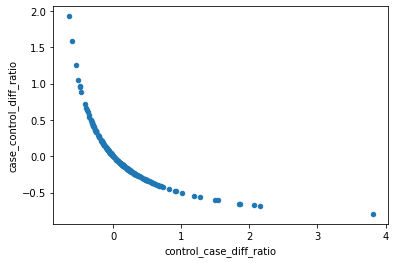

In [4]:
df_gene_scores_degree.query('case>=5 or control >=5').plot.scatter(y='case_control_diff_ratio',x='control_case_diff_ratio')

<AxesSubplot:>

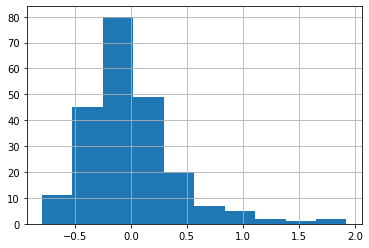

In [5]:
df_gene_scores_degree.case_control_diff_ratio.hist()

In [ ]:
df_gene_scores_degree.sort_values('case',ascending=False)

In [29]:
df_gene_scores_degree.case.values[:5].argpartition(4)

array([4, 1, 2, 3, 0])

In [5]:

reload(utils_enrich)
enr_gene_list = list(df_gene_scores_degree.query('(case>=5 or control >=5 )and case_control_diff_ratio>=.5').index)
df_enrich_top_up_degree = utils_enrich.parallel_gseapy_enr(enr_gene_list,background_gene= df_gene_scores_degree.index)
enr_gene_list = list(df_gene_scores_degree.query('(case>=5 or control >=5) and control_case_diff_ratio>=.5').index)
df_enrich_top_down_degree = utils_enrich.parallel_gseapy_enr(enr_gene_list,background_gene= df_gene_scores_degree.index)

2023-02-27 16:08:50,933	INFO services.py:1456 -- View the Ray dashboard at http://127.0.0.1:8265
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.96it/s]


In [6]:
df_enrich_top_down_degree

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Genes,n_found
0,Rare Diseases GeneRIF Gene Lists,Leigh syndrome,6/246,0.000001,0.000162,21.446739,PLA2G12A SEC24B CYP2U1 C4ORF3 DKK2 MAD2L1,6
1,GO Molecular Function 2021,CXCR3 chemokine receptor binding (GO:0048248),2/5,0.00002,0.000729,493.037037,CXCL11 PF4,2
2,Elsevier Pathway Collection,APC/C-CDC20 Complex,3/33,0.000015,0.000741,76.696154,CCNA2 ANAPC10 MAD2L1,3
3,TG GATES 2020,24hr diclofenac,14/2329,0.000001,0.000864,7.11833,TRMT10A PLA2G12A HSD17B11 ARHGAP24 CCNA2 PPP3C...,14
4,NCI-60 Cancer Cell Lines,GM2313,5/301,0.000066,0.001648,13.847832,SEC24B CXCL11 DNAJB14 MAD2L1 HERC6,5
5,RNA-Seq Disease Gene and Drug Signatures from GEO,Renal Cell Carcinoma Kidney GSE69197 down,7/498,0.000006,0.002865,12.623588,SCOC EMCN MRPL1 C4ORF3 KLHL8 TBC1D9 ARHGAP24,7
6,PheWeb 2019,Leukoplakia of oral mucosa,2/11,0.000111,0.00443,164.296296,PPP3CA DKK2,2
7,GO Molecular Function 2021,CXCR chemokine receptor binding (GO:0045236),2/17,0.000272,0.004903,98.548148,CXCL11 PF4,2
8,InterPro Domains 2019,CXC Chemokine domain,2/14,0.000183,0.004934,123.203704,CXCL11 PF4,2
9,LINCS L1000 CRISPR KO Consensus Sigs,CLEC7A Down,6/245,0.000001,0.006647,21.537566,CXCL11 PAQR3 TBC1D9 DNAJB14 PF4 MAD2L1,6


In [7]:
df_enrich_top_up_degree

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Genes,n_found
0,Jensen DISEASES,Chromosome 4q21 deletion syndrome,2/5,0.000005,0.0001,1110.166667,BMP3 HNRNPD,2
1,ChEA 2022,LMO2 26923725 Chip-Seq MACROPHAGESS Mouse,5/346,0.000003,0.0011,32.005539,INPP4B BMP3 IL15 HNRNPD RNF150,5
2,LINCS L1000 Chem Pert Consensus Sigs,LY-2157299 Down,5/246,0.0,0.001621,45.516367,INPP4B IL15 ANXA5 CXCL5 SEC31A,5
3,GWAS Catalog 2019,Severe malaria,2/19,0.000077,0.002782,195.77451,INPP4B GYPE,2
4,huMAP,SEC23A,1/5,0.003495,0.003495,384.269231,SEC31A,1
5,PhenGenI Association 2021,Malaria,2/21,0.000095,0.004457,175.149123,INPP4B GYPE,2
6,Tabula Sapiens,Skin-macrophage,2/99,0.002123,0.006497,34.17354,ANXA5 CXCL5,2
7,Tabula Sapiens,Skin-cd1c-positive Myeloid Dendritic Cell,2/100,0.002166,0.006497,33.823129,ANXA5 CXCL5,2
8,Azimuth Cell Types 2021,VIP+ LINC01013+ Layer 1-5 GABAergic Neuron CL0...,1/9,0.006284,0.006979,192.096154,INPP4B,1
9,Azimuth Cell Types 2021,VIP+ HTR3A+ Layer 1-2 GABAergic Neuron CL0000617,1/10,0.006979,0.006979,170.74359,INPP4B,1


### Betweenness

In [10]:
df_gene_scores_betweenness = df_gene_scores_mean.reset_index().pivot(index='Gene',columns = 'pop',values='Betweenness')
df_gene_scores_betweenness['case_control_diff'] = df_gene_scores_betweenness['case'] - df_gene_scores_betweenness['control']
df_gene_scores_betweenness['case_control_diff_abs'] = (df_gene_scores_betweenness['case'] - df_gene_scores_betweenness['control']).abs()
df_gene_scores_betweenness['case_control_diff_ratio'] = df_gene_scores_betweenness['case_control_diff']/df_gene_scores_betweenness['control']
df_gene_scores_betweenness['control_case_diff_ratio'] = -df_gene_scores_betweenness['case_control_diff']/df_gene_scores_betweenness['case']


<AxesSubplot:>

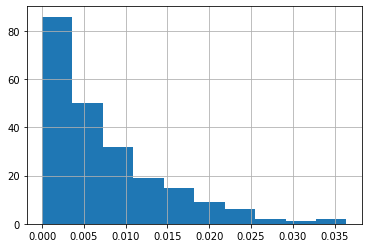

In [15]:
df_gene_scores_betweenness.case.hist()

In [20]:
df_gene_scores_betweenness.query('case>=0.01 or control >=0.01').sort_values('case_control_diff_ratio',ascending=False).head(20)

pop,case,control,case_control_diff,case_control_diff_abs,case_control_diff_ratio,control_case_diff_ratio
Gene,,,,,,
ANXA5,0.021202,0.003102,0.018099,0.018099,5.833964,-0.853672
HPSE,0.011167,0.001822,0.009345,0.009345,5.128180,-0.836819
SCD5,0.022427,0.006086,0.016341,0.016341,2.684930,-0.728624
HERC5,0.012791,0.003572,0.009219,0.009219,2.580584,-0.720716
HHIP-AS1,0.012422,0.005716,0.006706,0.006706,1.173244,-0.539858
SPRY1,0.012336,0.005838,0.006498,0.006498,1.113069,-0.526755
ABCE1,0.016996,0.009050,0.007945,0.007945,0.877935,-0.467500
SHROOM3,0.020528,0.011040,0.009488,0.009488,0.859480,-0.462215
MANBA,0.010482,0.005784,0.004699,0.004699,0.812342,-0.448228
